# Data Cleaning


Raw data can come in all kinds of strange distribution and non uniform formats, that it makes analyzing of data and creation of model very difficult. In this notebook we will be using sklearn library for performing common data cleaning steps, such as 

1.   Remove outliers
2.   Balance the data





In [ ]:
# Imports

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction import DictVectorizer

**Boxplot**

Boxplot is a chart used to visualize how a given data is distributed using quartiles. It shows the the minimum, maximum, median, firstquartile and third quartile in the dataset.

Here we will check the outliers in the data using BoxPlot.

In [ ]:
from scipy.integrate import quad
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
wineData = pd.read_csv("/content/wine.csv")
wineData.head(3)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


Boxplot


*   Tell you the values of your outliers.
*   Identify id data is symmetrical.

*   Determine how tightly data is grouped
*   See if your data is skewed

We are using Pandas here because it requires less code






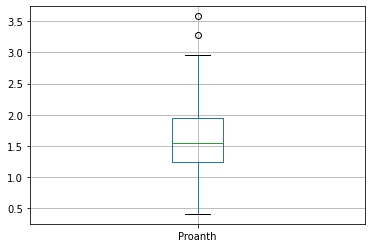

In [ ]:
wineData.boxplot(column = 'Proanth');
plt.title('')
plt.savefig('pandas_basic_area_mean_diagnosis.png')

Here we specify the column names to check the outliers in that column , we see that the column 'Proanth' has outliers above 3.2 and they can be removed

**SMOTE** for Imbalanced Classification

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

Hence we use SMOTE to balance the data, here SMOTE will add values to the columns which is not equal to the rest of the columns and make all the coulmns in the dataset have equal number of rows making it balance.




In [ ]:
pip install imbalanced-learn

In [ ]:
#import modules
import imblearn
from imblearn.over_sampling import SMOTE

In [ ]:
SmoteData = pd.read_csv("/content/hackathon_new.csv")
SmoteData.head(3)
SmoteData.shape #To check the number of rows 

(45211, 18)

In [ ]:
smote_nc = SMOTENC(categorical_features=[2,3,4,5,7,8,9,11,16], random_state=0)
x, y = smote_nc.fit_resample(SmoteData.drop('y', axis=1), SmoteData["y"])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from pandas import Series
from numpy.random import randn
balancedData = pd.DataFrame(x,columns=SmoteData.drop('y', axis=1).columns )
balancedData

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79839,42080.9,68.1156,retired,single,secondary,no,2367.88,no,no,cellular,29.8953,oct,219.765,2.10469,-1,0,unknown
79840,13271.1,34.8026,technician,single,secondary,no,27.1775,no,yes,cellular,8,jul,641.128,1.26645,-1,0,unknown
79841,43537.4,54.4984,management,married,tertiary,no,12129,no,no,cellular,23.6471,jul,501.933,1.31487,130.544,0.685125,success
79842,37631.1,44.556,technician,divorced,secondary,no,-545.971,yes,no,cellular,14,may,602.053,1,-1,0,unknown


The results shows there is a change in the shape of the dataset,which means all the columns have equal number of rows and is balanced and is ready to use in a machine learning model.